In [1]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)
    
from pathlib import Path

In [2]:
training_path = 'ARC/data/training'
evaluation_path = 'ARC/data/evaluation'

training_tasks = sorted(os.listdir(training_path))
evaluation_tasks = sorted(os.listdir(evaluation_path))
print(training_tasks[1])
print(len(training_tasks), len(evaluation_tasks))

00d62c1b.json
400 400


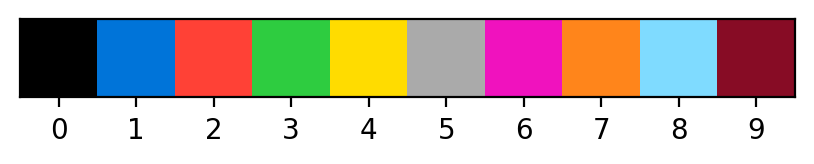

In [21]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()


In [4]:
def get_data(task_filename):
    with open(task_filename, 'r') as f:
        task = json.load(f)
    return task

num2color = ["black", "blue", "red", "green", "yellow", "gray", "magenta", "orange", "sky", "brown"]
color2num = {c: n for n, c in enumerate(num2color)}

In [5]:
def check(task, pred_func):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(3, n, figsize=(4*n,12), dpi=50)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        t_pred = pred_func(t_in)
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        axs[2][fig_num].imshow(t_pred, cmap=cmap, norm=norm)
        axs[2][fig_num].set_title(f'Train-{i} pred')
        axs[2][fig_num].set_yticks(list(range(t_pred.shape[0])))
        axs[2][fig_num].set_xticks(list(range(t_pred.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        t_pred = pred_func(t_in)
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        axs[2][fig_num].imshow(t_pred, cmap=cmap, norm=norm)
        axs[2][fig_num].set_title(f'Test-{i} pred')
        axs[2][fig_num].set_yticks(list(range(t_pred.shape[0])))
        axs[2][fig_num].set_xticks(list(range(t_pred.shape[1])))
        fig_num += 1

In [ ]:
def task_train001(x):
    green, yellow = color2num["green"], color2num["yellow"]
    
    def get_closed_area(arr):
        # depth first search
        H, W = arr.shape
        Dy = [0, -1, 0, 1]
        Dx = [1, 0, -1, 0]
        arr_padded = np.pad(arr, ((1,1),(1,1)), "constant", constant_values=0)
        searched = np.zeros(arr_padded.shape, dtype=bool)
        searched[0, 0] = True
        q = [(0, 0)]
        while q:
            y, x = q.pop()
            for dy, dx in zip(Dy, Dx):
                y_, x_ = y+dy, x+dx
                if not 0 <= y_ < H+2 or not 0 <= x_ < W+2:
                    continue
                if not searched[y_][x_] and arr_padded[y_][x_]==0:
                    q.append((y_, x_))
                    searched[y_, x_] = True
        res = searched[1:-1, 1:-1]
        res |= arr==green
        return ~res
        
    y = x.copy()
    y[get_closed_area(x)] = yellow
    return y

task = get_data('ARC/data/training/' + training_tasks[1])
check(task, task_train001)

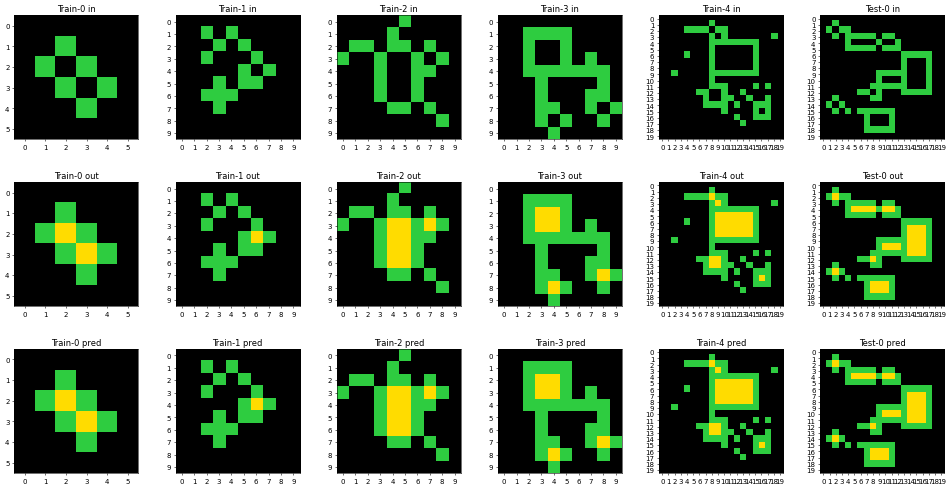

In [20]:
def task_train001(x):
    # Get numerical values for green and yellow colors
    green, yellow = color2num["green"], color2num["yellow"]

    # Function to find closed areas in the input array
    def get_closed_area(arr):
        H, W = arr.shape
        # Initialize a boolean array to store closed areas
        closed_area = np.zeros_like(arr, dtype=bool)

        # Recursive flood-fill algorithm to mark closed areas
        def flood_fill(y, x):
            # Check if the current point is within the array bounds and not green or already visited
            if not (0 <= y < H and 0 <= x < W) or arr[y, x] == green or closed_area[y, x]:
                return
            # Mark the current point as visited
            closed_area[y, x] = True
            # Recursively fill neighboring points
            flood_fill(y + 1, x)
            flood_fill(y - 1, x)
            flood_fill(y, x + 1)
            flood_fill(y, x - 1)

        # Start flood-fill from non-green cells on the borders
        for i in range(H):
            if x[i, 0] != green:
                flood_fill(i, 0)
            if x[i, W - 1] != green:
                flood_fill(i, W - 1)
        for j in range(W):
            if x[0, j] != green:
                flood_fill(0, j)
            if x[H - 1, j] != green:
                flood_fill(H - 1, j)

        return closed_area

    # Copy the input array
    y = x.copy()
    # Get the closed area mask
    closed_area = get_closed_area(x)
    # Set non-closed areas to yellow
    y[~closed_area] = yellow
    # Set original green areas back to green
    y[x == green] = green
    
    # Return the modified array
    return y
task = get_data('ARC/data/training/' + training_tasks[1])
check(task, task_train001)